In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
#dataset = pd.read_csv('/content/DataForMDPDataset.csv')
df1 = pd.read_csv('Final_Datasetnew.csv')
df2 = pd.read_csv('Final_Datasetnew2.csv')
data = pd.concat([df1, df2])
data = data.drop(['Next_State'], axis = 1)
data.head()

,State,Action,Reward
0,1,neutral,-1
1,1,neutral,10
2,2,neutral,10
3,2,neutral,-1
4,1,neutral,10


In [ ]:
# Need to label encode the actions 
# Positive - 2
# Neutral - 1
# Negative - 0 

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Action'] = label_encoder.fit_transform(data['Action'])
print(data['Action'].unique())
data.head(5)

[1 2 0]


,State,Action,Reward
0,1,1,-1
1,1,1,10
2,2,1,10
3,2,1,-1
4,1,1,10


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6558 entries, 0 to 4431
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   State   6558 non-null   int64
 1   Action  6558 non-null   int64
 2   Reward  6558 non-null   int64
dtypes: int64(3)
memory usage: 204.9 KB


In [ ]:
data.describe()

,State,Action,Reward
count,6558.000000,6558.000000,6558.000000
mean,2.325709,0.814578,21.369472
std,0.889013,0.542888,27.183451
min,1.000000,0.000000,-1.000000
25%,2.000000,0.000000,10.000000
50%,2.000000,1.000000,10.000000
75%,3.000000,1.000000,25.000000
max,4.000000,2.000000,100.000000


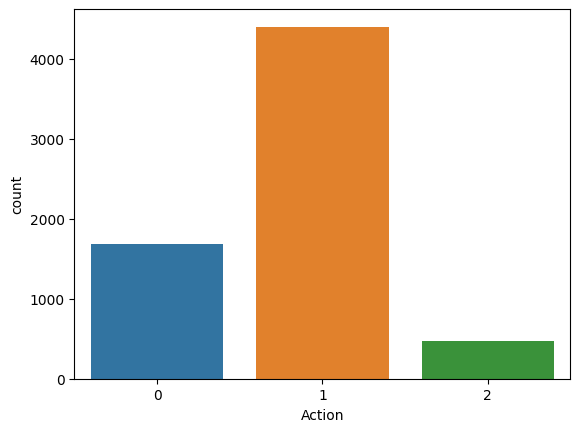

In [ ]:
sns.countplot(x='Action', data=data)
plt.show()

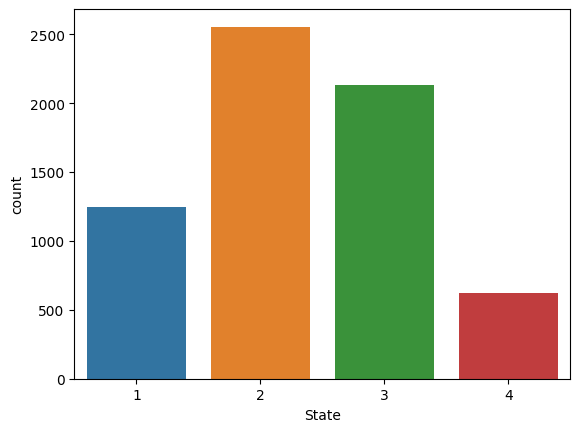

In [ ]:
sns.countplot(x='State', data=data)
plt.show()

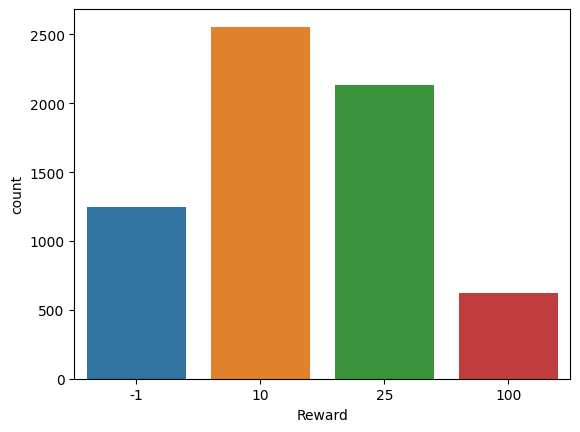

In [ ]:
sns.countplot(x='Reward', data=data)
plt.show()

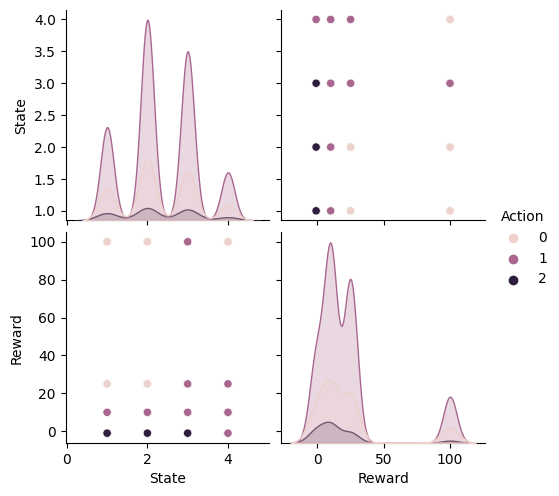

In [ ]:
sns.pairplot(data, hue = 'Action')
plt.show()

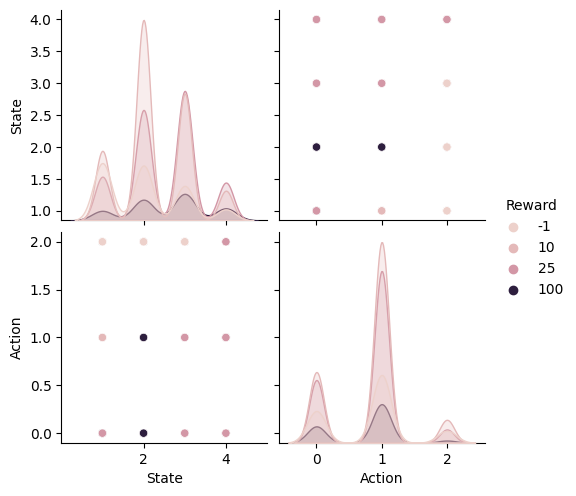

In [ ]:
sns.pairplot(data, hue = 'Reward')
plt.show()

In [ ]:
corr = data.corr()
corr

,State,Action,Reward
State,1.000000,0.007287,0.159825
Action,0.007287,1.000000,-0.042316
Reward,0.159825,-0.042316,1.000000


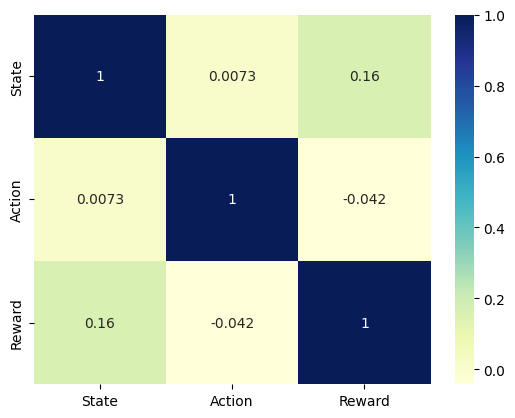

In [ ]:
# Corr as heatmap 
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

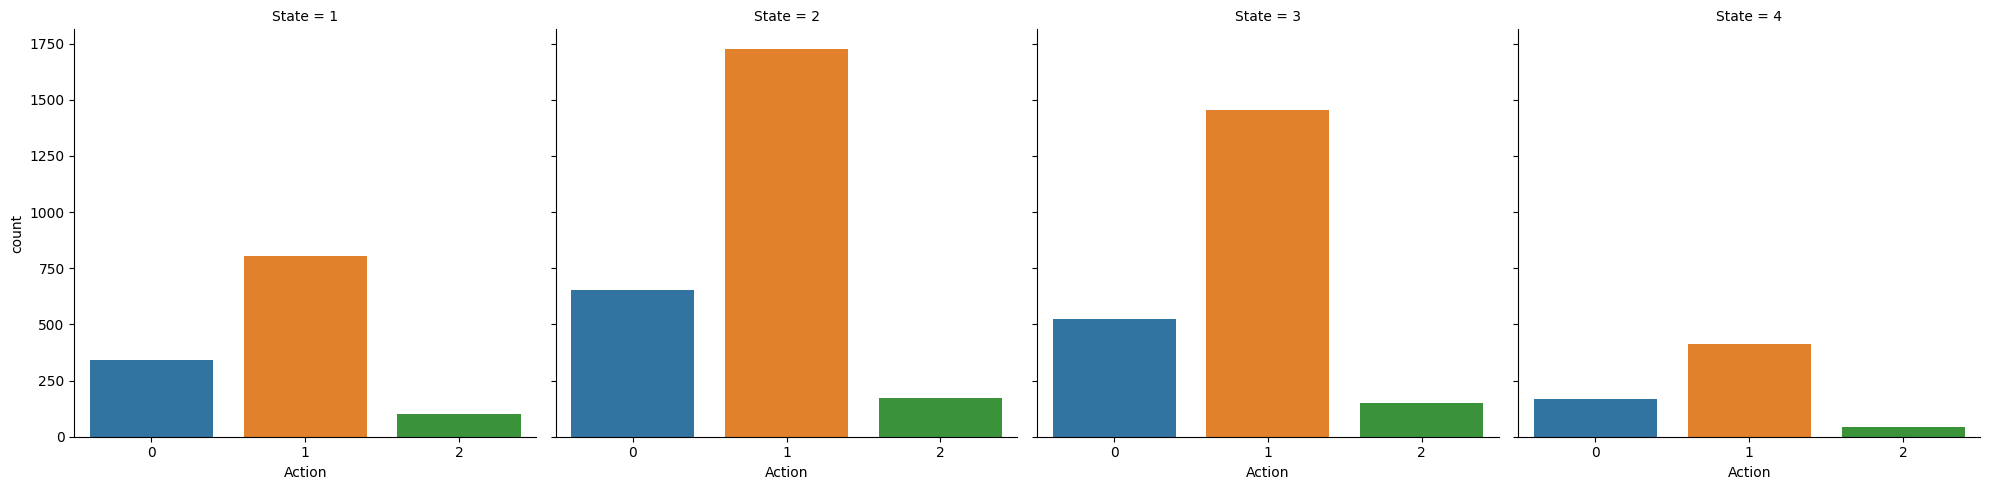

In [ ]:
sns.catplot(x='Action', col='State', kind='count', data=data)
plt.show()

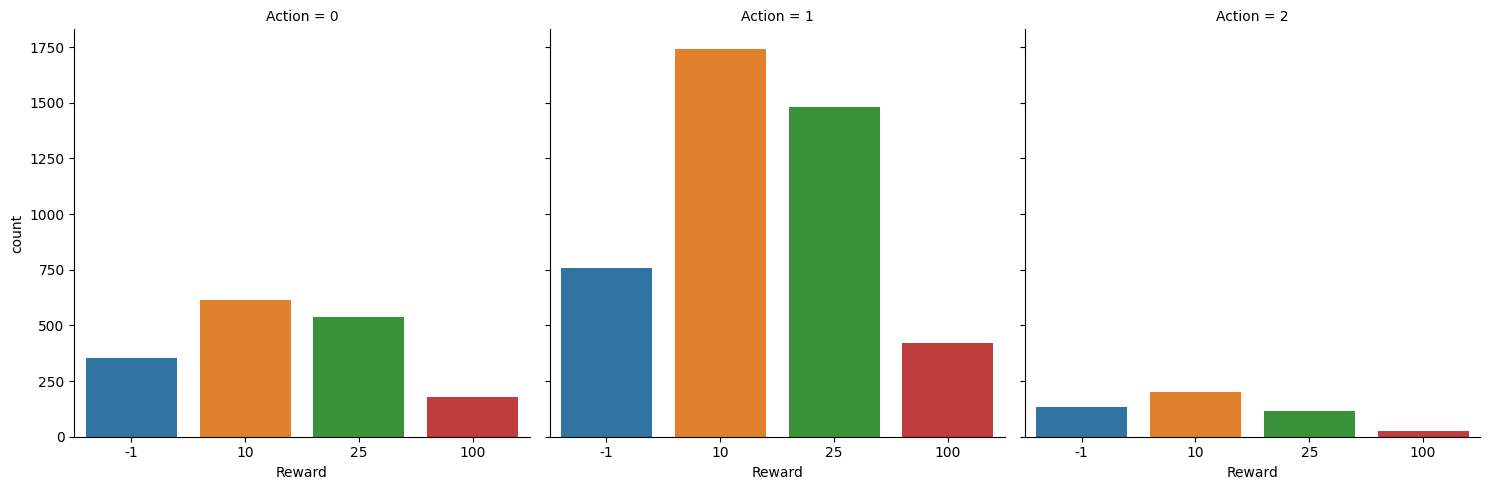

In [ ]:
sns.catplot(x='Reward', col='Action', kind='count', data=data)
plt.show()

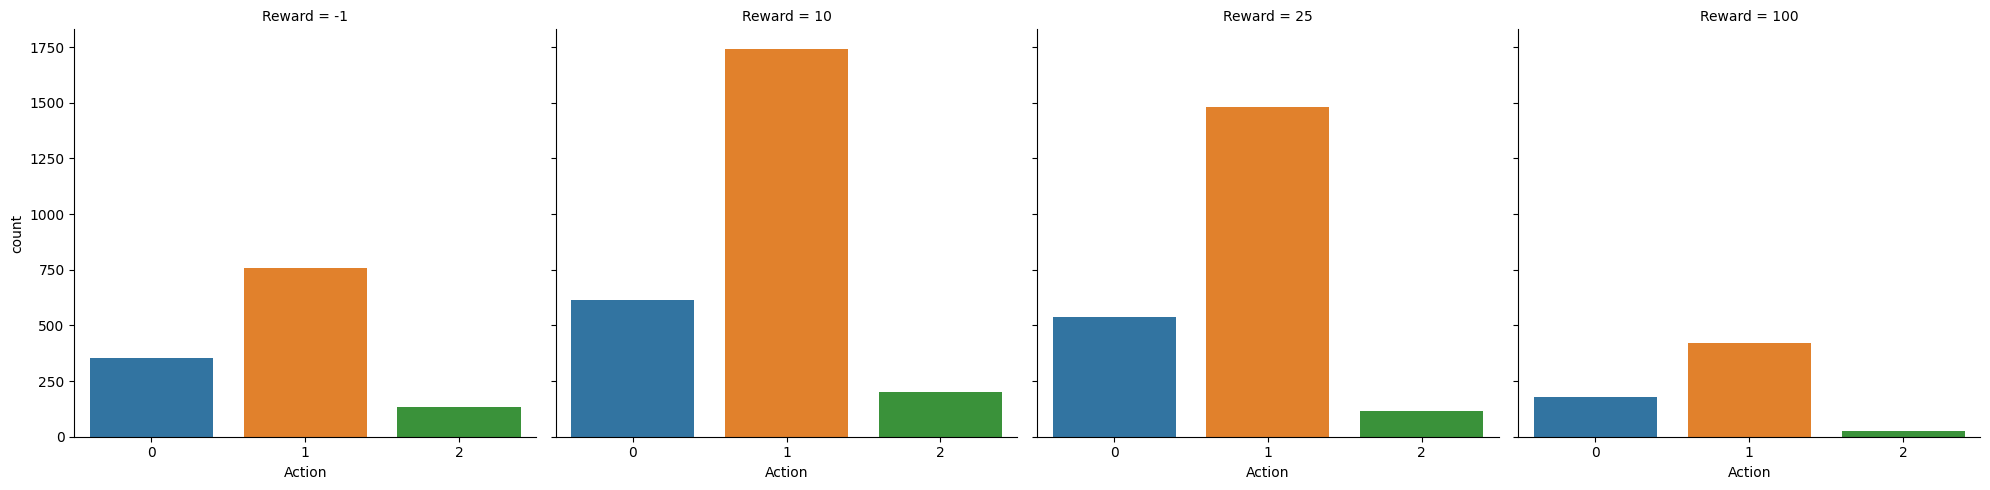

In [ ]:
sns.catplot(x='Action', col='Reward', kind='count', data=data)
plt.show()

Test for stationarity 

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
data = pd.read_csv('/content/data_New_MDP.csv')
data.head()

,State,Action,Reward,ET
0,1,1,-1,1
1,1,1,10,0
2,2,1,10,0
3,2,1,-1,0
4,1,1,10,0


In [ ]:
from statsmodels.tsa.stattools import adfuller
print("Observations of Dickey-fuller test for the State")
dftest = adfuller(data['State'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
for key,value in dftest[4].items():
    dfoutput['critical value (%s)'%key]= value
print(dfoutput)

Observations of Dickey-fuller test for the State
Test Statistic                -1.632106e+01
p-value                        3.127354e-29
#lags used                     1.300000e+01
number of observations used    6.544000e+03
critical value (1%)           -3.431350e+00
critical value (5%)           -2.861982e+00
critical value (10%)          -2.567005e+00
dtype: float64


In [ ]:
from statsmodels.tsa.stattools import adfuller
print("Observations of Dickey-fuller test for the Action")
dftest = adfuller(data['Action'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
for key,value in dftest[4].items():
    dfoutput['critical value (%s)'%key]= value
print(dfoutput)

Observations of Dickey-fuller test for the Action
Test Statistic                -1.795324e+01
p-value                        2.833762e-30
#lags used                     1.400000e+01
number of observations used    6.543000e+03
critical value (1%)           -3.431350e+00
critical value (5%)           -2.861982e+00
critical value (10%)          -2.567005e+00
dtype: float64


In [ ]:
from statsmodels.tsa.stattools import adfuller
print("Observations of Dickey-fuller test for the reward")
dftest = adfuller(data['Reward'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
for key,value in dftest[4].items():
    dfoutput['critical value (%s)'%key]= value
print(dfoutput)

Observations of Dickey-fuller test for the reward
Test Statistic                  -19.080873
p-value                           0.000000
#lags used                       10.000000
number of observations used    6547.000000
critical value (1%)              -3.431349
critical value (5%)              -2.861982
critical value (10%)             -2.567005
dtype: float64
